# Name: Anyamanee Pornpavattana [Ploy]
# ID:6410422031
# My score: 0.988 (#4)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dads6003-in-class-competition/sampleSubmission.csv
/kaggle/input/dads6003-in-class-competition/train.csv
/kaggle/input/dads6003-in-class-competition/test.csv


In [2]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [3]:
#Read Dataset
# Train set
train_df = pd.read_csv('/kaggle/input/dads6003-in-class-competition/train.csv')
train_df.info()
# Test set
test_df = pd.read_csv('/kaggle/input/dads6003-in-class-competition/test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7391 non-null   float64
 1   x2      7466 non-null   float64
 2   x3      7444 non-null   float64
 3   x4      7407 non-null   float64
 4   x5      7440 non-null   float64
 5   x6      7382 non-null   float64
 6   x7      7419 non-null   float64
 7   x8      7365 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7421 non-null   float64
 10  x11     7483 non-null   float64
 11  x12     7488 non-null   float64
 12  x13     7370 non-null   float64
 13  x14     7376 non-null   float64
 14  x15     7393 non-null   float64
 15  x16     7407 non-null   float64
 16  x17     7375 non-null   float64
 17  x18     7480 non-null   float64
 18  x19     7355 non-null   float64
 19  x20     7374 non-null   float64
 20  y       7500 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

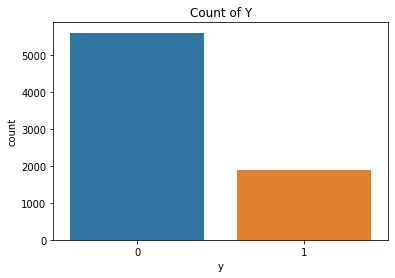

% of y_1 in train dataset:  25.266666666666666
% of y_0 in train dataset:  74.73333333333333


In [4]:
#Check Class of Train Data
# Train set plot
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='y', data=train_df)
plt.title("Count of Y")
plt.show()

n=len(train_df)
y_0=len(train_df[train_df['y']==0])
y_1=len(train_df[train_df['y']==1])

print("% of y_1 in train dataset: ",y_1*100/n)
print("% of y_0 in train dataset: ",y_0*100/n)

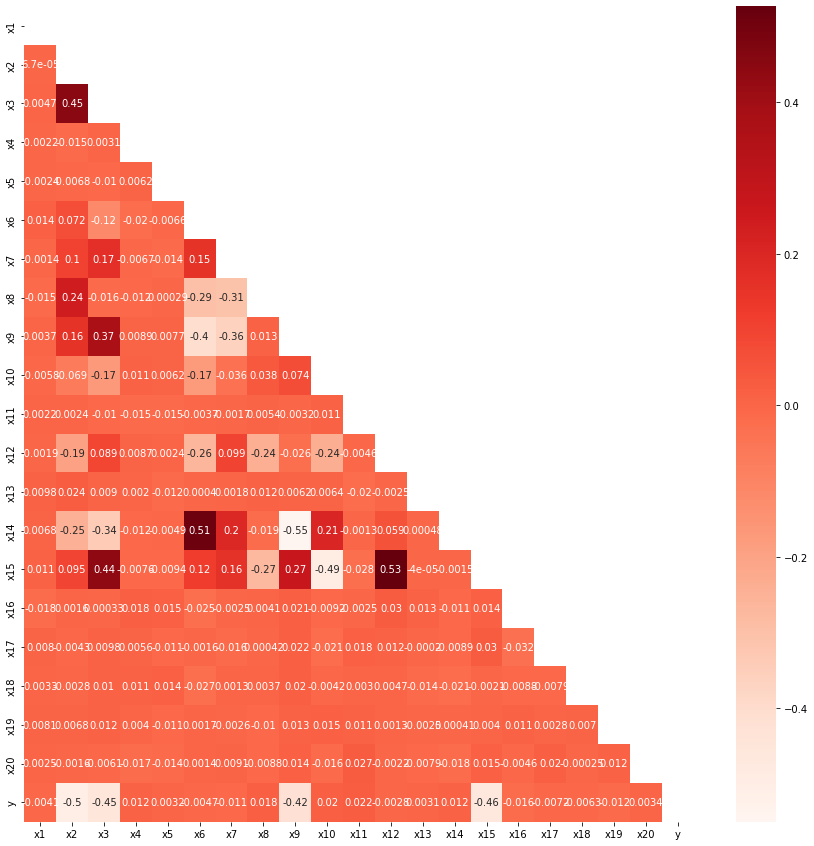

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = train_df.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor,mask =mask, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.009]

# Split Dataset

In [6]:
# Fill data by using mode
fill_mode = lambda col: col.fillna(col.mode())
train_df = train_df.apply(fill_mode, axis=0)
#train_df.info()

In [7]:
# Select Features
ip_train = train_df.copy()

cols =["x2","x3","x6","x7","x8","x9","x10","x12","x14","x15","y"]

ip_train = ip_train.loc[:,cols]
ip_train =ip_train.dropna() #Drop data NA
print(ip_train.head(3))

num_cols = cols[0:-1]

X = ip_train.loc[:,num_cols]
Y = ip_train.loc[:,["y"]]

print(f'X => {X.shape} \nY => {Y.shape}')
print(X.head(3))

           x2         x3          x6          x7         x8            x9  \
0 -166.447703  57.634618  773.535357 -425.516507  19.541551  102333.24180   
1 -175.583196  61.413742  592.665369 -154.993322  17.165756   56410.00878   
2 -266.301983  43.228042  912.741203 -337.001477  18.362978   37204.35472   

         x10       x12         x14        x15  y  
0  37.515512  1.177903   65.320993  10.856422  0  
1  33.667832  6.288225  124.629610  19.519498  0  
2  24.194495  5.241047  136.536890  16.824492  1  
X => (7486, 10) 
Y => (7486, 1)
           x2         x3          x6          x7         x8            x9  \
0 -166.447703  57.634618  773.535357 -425.516507  19.541551  102333.24180   
1 -175.583196  61.413742  592.665369 -154.993322  17.165756   56410.00878   
2 -266.301983  43.228042  912.741203 -337.001477  18.362978   37204.35472   

         x10       x12         x14        x15  
0  37.515512  1.177903   65.320993  10.856422  
1  33.667832  6.288225  124.629610  19.519498  
2 

In [8]:
from sklearn.model_selection import train_test_split
# Data split (75/25 ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=128)
X_train.shape, Y_train.shape,X_test.shape, Y_test.shape

((5614, 10), (5614, 1), (1872, 10), (1872, 1))

In [9]:
#Model All
models = {}

from sklearn.neural_network import MLPClassifier
models['NN1']  = MLPClassifier(alpha= 0.001, hidden_layer_sizes= 13, max_iter= 100, random_state =128, solver= 'lbfgs')
models['NN2']  = MLPClassifier(alpha= 1, hidden_layer_sizes= 13, max_iter= 100, random_state =128, solver= 'lbfgs')
models['NN3'] = MLPClassifier(alpha= 1, hidden_layer_sizes= 11, max_iter= 100, random_state =1, solver= 'lbfgs')


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy, precision, recall, f1 = {}, {}, {}, {}

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.pipeline import Pipeline

for key in models.keys():
    
    models[key]= Pipeline([('scaler',scaler),('clf',models[key])])
    # Fit the classifier model
    models[key].fit(X_train, Y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions,Y_test)
    precision[key] = precision_score(predictions, Y_test)
    recall[key] = recall_score(predictions, Y_test)
    f1[key] = f1_score(predictions, Y_test)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/s

In [10]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()

df_model

,Accuracy,Precision,Recall,F1
NN1,0.979167,0.953684,0.963830,0.958730
NN2,0.982372,0.960000,0.970213,0.965079
NN3,0.980769,0.960000,0.964059,0.962025


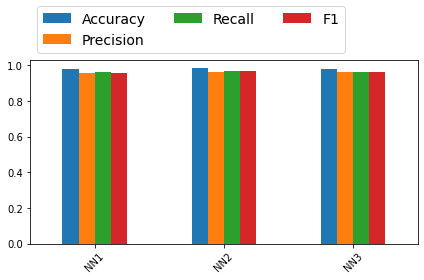

In [11]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

clf = models['NN3']
scores = cross_val_score(clf, X_train, Y_train, cv=10, scoring='f1')

print(scores)
print(scores.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/s

[0.96085409 0.95744681 0.97183099 0.97508897 0.95714286 0.9787234
 0.96113074 0.93286219 0.97526502 0.98245614]
0.9652801207203441


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [13]:
#Train set 75%
clf = clf.fit(X_train, Y_train)

print("Training:"+str(clf.score(X_train,Y_train)))
print("Test:"+str(clf.score(X_test,Y_test)))

pred_train75 = clf.predict(X_train)

pred_train25 = clf.predict(X_test)
clf.predict_proba(X_test[:1])

print(f'\nTrain Set:\n{classification_report(Y_train, pred_train75)}')
print(f'Test Set:\n{classification_report(Y_test, pred_train25)}')

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training:0.9903811898824367
Test:0.9807692307692307

Train Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4199
           1       0.98      0.98      0.98      1415

    accuracy                           0.99      5614
   macro avg       0.99      0.99      0.99      5614
weighted avg       0.99      0.99      0.99      5614

Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1397
           1       0.96      0.96      0.96       475

    accuracy                           0.98      1872
   macro avg       0.98      0.97      0.97      1872
weighted avg       0.98      0.98      0.98      1872



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [14]:
#Train set 100%
clf = clf.fit(X, Y)

print("Training:"+str(clf.score(X,Y)))

pred_train100 = clf.predict(X)
print(f'\nAll Train Set:\n{classification_report(Y, pred_train100)}')

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training:0.9890462196099385

All Train Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5596
           1       0.98      0.97      0.98      1890

    accuracy                           0.99      7486
   macro avg       0.99      0.98      0.99      7486
weighted avg       0.99      0.99      0.99      7486



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, Y, cv=10, scoring='f1')
print(scores)
print(scores.mean())


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/s

[0.96569921 0.96891192 0.96533333 0.97368421 0.96825397 0.9703504
 0.97340426 0.97311828 0.95934959 0.95514512]
0.9673250289086489


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Test Dataset

In [16]:
# Copying original dataframe
test_df_ready = test_df.loc[:,num_cols]
test_df_ready.head()

,x2,x3,x6,x7,x8,x9,x10,x12,x14,x15
0,-413.657030,17.037929,704.164878,-269.815659,13.503896,60805.03782,31.065906,5.150013,174.281276,19.959450
1,-235.197680,53.670585,1226.941573,-184.656449,7.034055,55445.68723,15.189238,3.880180,32.216142,17.054081
2,-192.880170,38.687566,940.690132,-182.564985,17.218596,31562.61815,34.769586,4.885215,181.736690,20.479688
3,-204.849932,50.837951,794.581702,-245.911853,9.936746,47299.76010,25.565751,7.156563,127.570137,20.904829
4,-141.457819,53.246627,543.441438,-302.081360,21.861266,66725.53006,34.796947,4.743589,119.269139,19.826086


In [17]:
x_test = test_df_ready
print(x_test.head())

pred_final = clf.predict(x_test)

           x2         x3           x6          x7         x8           x9  \
0 -413.657030  17.037929   704.164878 -269.815659  13.503896  60805.03782   
1 -235.197680  53.670585  1226.941573 -184.656449   7.034055  55445.68723   
2 -192.880170  38.687566   940.690132 -182.564985  17.218596  31562.61815   
3 -204.849932  50.837951   794.581702 -245.911853   9.936746  47299.76010   
4 -141.457819  53.246627   543.441438 -302.081360  21.861266  66725.53006   

         x10       x12         x14        x15  
0  31.065906  5.150013  174.281276  19.959450  
1  15.189238  3.880180   32.216142  17.054081  
2  34.769586  4.885215  181.736690  20.479688  
3  25.565751  7.156563  127.570137  20.904829  
4  34.796947  4.743589  119.269139  19.826086  


In [18]:
# output
fields = ['id','Expected']
df = pd.DataFrame()
id = list(range(1,2501))
df['id']=pd.Series(id)
df['Expected']=pd.Series(pred_final)
df.to_csv('submit.csv', index=False)

print(df.head())

   id  Expected
0   1         1
1   2         1
2   3         0
3   4         0
4   5         0


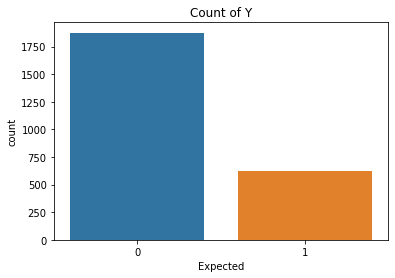

% of y_1 in train dataset:  25.0
% of y_0 in train dataset:  75.0


In [19]:
# Test set plot
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Expected",data=df)
plt.title("Count of Y")
plt.show()

n=len(df)
y_0=len(df[df['Expected']==0])
y_1=len(df[df['Expected']==1])

print("% of y_1 in train dataset: ",y_1*100/n)
print("% of y_0 in train dataset: ",y_0*100/n)